# Hyperparameter tuning

now it's time to tune our models by changing hyperparameters

## import libs

In [22]:
import re
import string
from abc import ABC

from nltk.corpus import stopwords

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings

warnings.filterwarnings('ignore')

## import models, input providers and other codes

In [23]:
from input_providers import *
from metrics import MetricsCalculator
from models import *
from workflow import TrainValidationWorkflow

## train, validation and test data sets split

In [24]:
from sklearn.model_selection import train_test_split

df = pd.read_csv('./data/train.csv')
random_state_seed = 22
df_train_validation, df_test = train_test_split(df, test_size=0.2, random_state=random_state_seed)
df_train, df_validation = train_test_split(df_train_validation, test_size=0.25, random_state=random_state_seed)

In [25]:
input_providers = [InputProvider1(), InputProvider2(), InputProvider3(), InputProvider4(), InputProvider5()]

## hyperparameter tuning of Logistic regression model 
the important hyperparameters to tune for `sklearn.linear_model.LogisticRegression` include:
- `C`: inverse of the regularization strength
- `solver`
- `max_iter`

#### optimize inverse of the regularization strength

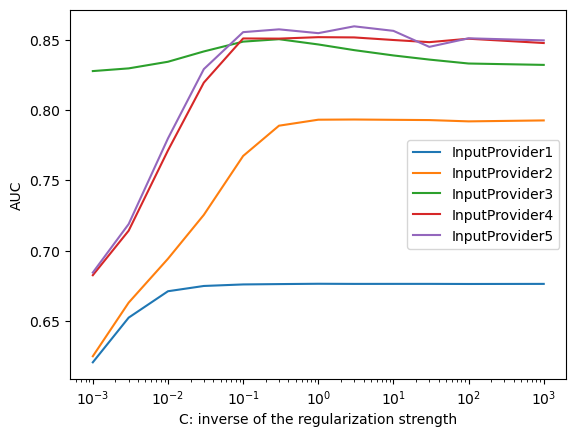

In [26]:
performance = dict()
c_range = [0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100, 1000]

for input_provider in input_providers:
    performance[input_provider.__class__.__name__] = []
    for c in c_range:
        metrics = TrainValidationWorkflow(
            model=LogisticRegressionModel(C=c, random_state=random_state_seed),
            input_provider=input_provider,
            df_train=df_train,
            df_validation=df_validation
        ).get_metrics_calculator()

        performance[input_provider.__class__.__name__].append(metrics.get_auc())

for key, value in performance.items():
    plt.semilogx(c_range, value, label=key)
    plt.xlabel('C: inverse of the regularization strength')
    plt.ylabel('AUC')
    plt.legend()

c=0.1 seems to be a good number for all input providers

#### optimize solver
sklearn logistic regression has various solvers:
1. newton-cg: This solver uses a modified Newton's method to solve the optimization problem. It is recommended for datasets with a small number of samples and features.
2. lbfgs: This solver uses the Limited-memory Broyden-Fletcher-Goldfarb-Shanno algorithm to solve the optimization problem. It is recommended for datasets with a small number of samples and features.
3. liblinear: This solver uses a coordinate descent algorithm to solve the optimization problem. **It is recommended for datasets with a large number of samples and features.**
4. sag: This solver uses a stochastic average gradient descent algorithm to solve the optimization problem. **It is recommended for datasets with a large number of samples and features.**
5. saga: This solver uses a variant of the stochastic average gradient descent algorithm to solve the optimization problem. **It is recommended for datasets with a large number of samples and features.**

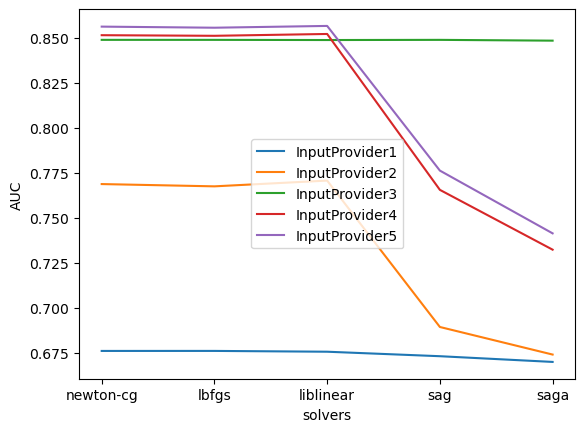

In [27]:
performance = dict()
solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

for input_provider in input_providers:
    performance[input_provider.__class__.__name__] = []
    for solver in solvers:
        metrics = TrainValidationWorkflow(
            model=LogisticRegressionModel(C=0.1, solver=solver, random_state=random_state_seed),
            input_provider=input_provider,
            df_train=df_train,
            df_validation=df_validation
        ).get_metrics_calculator()

        performance[input_provider.__class__.__name__].append(metrics.get_auc())

for key, value in performance.items():
    plt.plot(solvers, value, label=key)
    plt.xlabel('solvers')
    plt.ylabel('AUC')
    plt.legend()

liblinear seems to be a good model here

## optimize max_iter

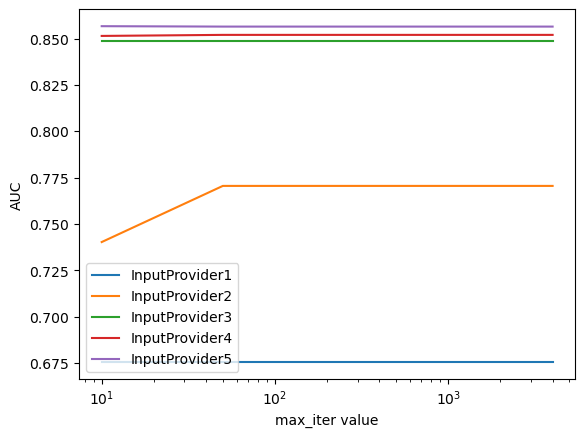

In [29]:
performance = dict()
max_iterations = [10, 50, 100, 200, 500, 1000, 2000, 4000]

for input_provider in input_providers:
    performance[input_provider.__class__.__name__] = []
    for max_iter in max_iterations:
        metrics = TrainValidationWorkflow(
            model=LogisticRegressionModel(C=0.1, solver='liblinear', max_iter=max_iter, random_state=random_state_seed),
            input_provider=input_provider,
            df_train=df_train,
            df_validation=df_validation
        ).get_metrics_calculator()

        performance[input_provider.__class__.__name__].append(metrics.get_auc())

for key, value in performance.items():
    plt.semilogx(max_iterations, value, label=key)
    plt.xlabel('max_iter value')
    plt.ylabel('AUC')
    plt.legend()

we would use the default value for max_iter which is 100
finally our model is this:

In [ ]:
LogisticRegressionModel(C=0.1, solver='liblinear', random_state=random_state_seed)

the important hyperparameters to tune for `sklearn.tree.DecisionTreeClassifier` include:
1. `max_depth`
2. `max_leaf_nodes`

the important hyperparameters to tune for `sklearn.ensemble.RandomForestClassifier` include:
1. `n_estimators`
2. `max_depth`
3. `max_leaf_nodes`

the important hyperparameters to tune for `sklearn.ensemble.GradientBoostingClassifier` include:
1. `max_iter`
2. `learning_rate`
3. `max_depth`

the important hyperparameters to tune for `xgboost` include:
1. `num_boost_round`
2. `eta`: Learning rate
3. `max_depth`
4. `min_child_weight`